In [1]:
from PIL import Image
from matplotlib.pyplot import imread
import numpy as np

In [2]:
im = imread('./data/region1_diam17_imZ_00205_305_3D.tif')
#im_lab, _ = label(im)

## plot_interact

In [11]:
from ipywidgets import interact, fixed, IntSlider
import ipywidgets as widgets
import matplotlib.pyplot as plt
from plot_interact import *

In [22]:
plot_interact(im, axis=0)

interactive(children=(IntSlider(value=0, description='depth', max=99), Output()), _dom_classes=('widget-intera…

In [74]:
plot_interact(im_lab)

interactive(children=(IntSlider(value=0, description='depth', max=99), Output()), _dom_classes=('widget-intera…

## multi_slice_viewer

In [5]:
%matplotlib notebook
import matplotlib.pyplot as plt

def multi_slice_viewer(volume, index=0, figsize=(6, 6)):
    """
    Method for viewing 3D images in a jupyter notebook


    Parameters
    ----------


    volume : 3D numpy array
        3D image for viewing plane-wise

    index : int
        Image index to display, defaults to zero


    """
    __remove_keymap_conflicts({'j', 'k'})
    fig, ax = plt.subplots(figsize=figsize)
    plt.tick_params(axis='both', which='both', top=False,
                    bottom=False, left=False, right=False,
                    labelbottom=False, labelleft=False)
    ax.volume = volume
    ax.index = index  # volume.shape[0] // 2
    ax.imshow(volume[ax.index])
    fig.canvas.mpl_connect('key_press_event', __process_key)


def __process_key(event):
    fig = event.canvas.figure
    ax = fig.axes[0]
    if event.key == 'j':
        __previous_slice(ax)
    elif event.key == 'k':
        __next_slice(ax)
    fig.canvas.draw()


def __previous_slice(ax):
    volume = ax.volume
    ax.index = (ax.index - 1) % volume.shape[0]  # wrap around using %
    ax.images[0].set_array(volume[ax.index])


def __next_slice(ax):
    volume = ax.volume
    ax.index = (ax.index + 1) % volume.shape[0]
    ax.images[0].set_array(volume[ax.index])


def __remove_keymap_conflicts(new_keys_set):
    for prop in plt.rcParams:
        if prop.startswith('keymap.'):
            keys = plt.rcParams[prop]
            remove_list = set(keys) & new_keys_set
            for key in remove_list:
                keys.remove(key)


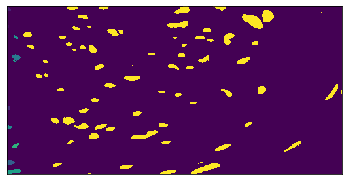

In [8]:
multi_slice_viewer(im_arr)

In [161]:
%matplotlib inline

## trimesh

In [12]:
#pip install trimesh

     |████████████████████████████████| 634kB 4.7MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import trimesh

In [14]:
trimesh.util.attach_to_log()

TypeError: 'module' object is not callable

## regionprops

In [3]:
#!pip install --upgrade scikit-image

In [4]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import regionprops, regionprops_table
from skimage.measure import marching_cubes, mesh_surface_area, find_contours
import pandas as pd
from scipy.ndimage import label
from skimage.io import imread
from skimage.morphology import remove_small_objects
import copy

/opt/anaconda3/lib/python3.7/site-packages/skimage/io/manage_plugins.py:23: UserWarning: Your installed pillow version is < 7.1.0. Several security issues (CVE-2020-11538, CVE-2020-10379, CVE-2020-10994, CVE-2020-10177) have been fixed in pillow 7.1.0 or higher. We recommend to upgrade this library.
  from .collection import imread_collection_wrapper


In [5]:
#im = imread('./data/example.tif')
im = imread('./data/region1_diam17_imZ_00205_305_3D.tif')

In [55]:
im_rso = remove_small_objects(im, min_size=150)

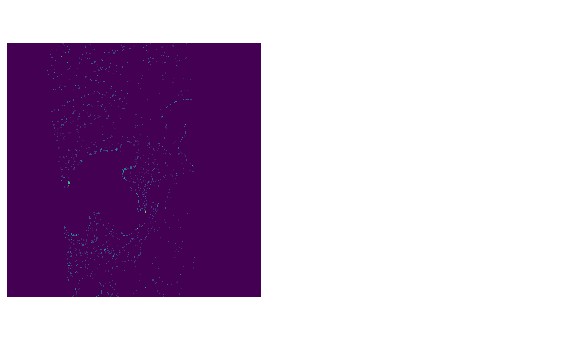

In [45]:
fig, axes = plt.subplots(ncols=2, figsize=(10,6))

axes[0].imshow(im_rso[0,:,:,], cmap='viridis')
#axes[1].imshow(im_lab[0,:,:], cmap='viridis')

for axi in axes:
    axi.axis('off')

In [36]:
regionprops()

In [ ]:
clearboundary

Only for 2D: eccentricity, moments_hu, perimeter

Long runtime: feret_diameter_max, convex_area, solidity

In [63]:
props = ['area', 'bbox', 'convex_area', 'centroid', 'equivalent_diameter', 'feret_diameter_max', 
         'inertia_tensor', 'inertia_tensor_eigvals', 'label', 'major_axis_length', 'minor_axis_length', 
         'moments', 'moments_central', 'moments_normalized',  'solidity']
regions = pd.DataFrame(regionprops_table(im_rso, properties=props))

In [66]:
regions

,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5,convex_area,centroid-0,centroid-1,...,moments_normalized-3-1-3,moments_normalized-3-2-0,moments_normalized-3-2-1,moments_normalized-3-2-2,moments_normalized-3-2-3,moments_normalized-3-3-0,moments_normalized-3-3-1,moments_normalized-3-3-2,moments_normalized-3-3-3,solidity
0,234,0,4,1006,4,12,1022,271,0.897436,7.794872,...,5.597058e-05,-0.000042,2.425033e-05,-0.000027,1.195860e-05,0.000025,0.000013,0.000001,0.000008,0.863469
1,526,0,35,373,7,45,389,602,2.030418,40.026616,...,1.569299e-04,0.000062,8.808096e-05,-0.000042,4.127437e-05,0.000231,0.000043,0.000019,0.000019,0.873754
2,763,0,69,1193,7,86,1208,894,1.850590,76.943644,...,6.155184e-05,0.000113,-1.793368e-04,0.000017,-3.836912e-05,-0.000290,0.000063,-0.000039,0.000008,0.853468
3,281,0,82,885,5,92,897,315,1.277580,86.583630,...,-1.607209e-05,-0.000032,-9.940612e-06,-0.000037,-2.391762e-06,0.000097,-0.000010,0.000003,-0.000003,0.892063
4,229,0,83,407,5,94,415,260,1.240175,88.406114,...,-5.638075e-07,-0.000061,-3.399685e-05,-0.000025,-4.507608e-06,0.000185,0.000006,0.000006,0.000002,0.880769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,221,96,1748,611,100,1759,620,235,97.787330,1752.574661,...,5.135793e-06,0.000026,-5.671713e-05,0.000020,-1.188518e-05,0.000325,-0.000004,0.000025,-0.000002,0.940426
10716,158,96,1909,661,100,1918,669,179,98.025316,1912.512658,...,2.360198e-05,0.000043,-8.986160e-06,0.000029,9.547418e-07,0.000200,0.000035,0.000015,0.000010,0.882682
10717,238,95,2004,503,100,2016,511,256,97.722689,2009.092437,...,1.850304e-05,0.000166,2.053721e-05,0.000046,3.846272e-06,0.000283,0.000045,0.000018,0.000011,0.929688
10718,303,95,2021,611,100,2031,621,340,97.518152,2025.161716,...,-3.741612e-05,0.000115,6.405809e-05,0.000036,1.308552e-05,0.000196,-0.000032,0.000018,-0.000008,0.891176


In [73]:
def cropImage(image, image_props, object_label, clean=False):
    """
    crops section of input image based on bounding box of labeled objects

    labeled objects are determined by the object_label which is a label in a
    property table
    
    
    Parameters
    ----------
    
    image : 3D numpy array
        labeled segmented image of nuclei
        
    image_props : pd.DataFrame
        pandas dataframe of properties with label and bbox as extracted features
        
    object_label : int
        label of object to crop from input image
        
    clean : bool, optional
        clear objects without input label
        
    
    Returns
    -------
    
    crop : 3D numpy array
        cropped region containing the labeled object, crop coordinates are 
    based on the bounding box.

    """

    assert(type(object_label) == int)

    prop = image_props.loc[image_props['label'] == object_label]

    if len(image.shape) == 2:
        coords = [prop['bbox-0'].values[0], prop['bbox-2'].values[0], 
                  prop['bbox-1'].values[0], prop['bbox-3'].values[0]]
        print(coords)

        crop = copy.deepcopy(image[coords[0]:coords[1], coords[2]:coords[3]])

    else:
        coords = [prop['bbox-0'].values[0], prop['bbox-3'].values[0], 
                  prop['bbox-1'].values[0], prop['bbox-4'].values[0],
                  prop['bbox-2'].values[0], prop['bbox-5'].values[0]]
        crop = copy.deepcopy(image[coords[0]:coords[1],
                             coords[2]:coords[3],
                             coords[4]:coords[5]])

    if clean:
        crop = np.ma.masked_where(crop != object_label, crop).filled(0)
        crop = (crop > 0).astype(int)
    return crop

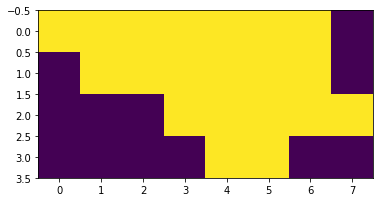

In [175]:
crop = cropImage(im_rso, regions, 1) == 1
plt.imshow(crop[:,:,10])

In [148]:
surface_area

,0
0,125.529449
1,218.570938
2,311.093323
3,135.194809
4,103.512405
...,...
10715,84.808411
10716,67.973007
10717,101.610115
10718,106.851425


In [176]:
## Get surface areas using marching cubes method
surface_area = pd.DataFrame()
for label in regions['label']:
    crop = cropImage(im_rso, regions, label) == label
    march = marching_cubes(crop)
    crop_sa = pd.DataFrame([mesh_surface_area(march[0], march[1])])
    surface_area = surface_area.append(crop_sa)

# Add to regions DataFrame
surface_area.reset_index(drop=True, inplace=True)
regions['surface_area'] = surface_area

In [199]:
regions

,area,bbox-0,bbox-1,bbox-2,bbox-3,bbox-4,bbox-5,convex_area,centroid-0,centroid-1,...,moments_normalized-3-2-0,moments_normalized-3-2-1,moments_normalized-3-2-2,moments_normalized-3-2-3,moments_normalized-3-3-0,moments_normalized-3-3-1,moments_normalized-3-3-2,moments_normalized-3-3-3,solidity,surface_area
0,234,0,4,1006,4,12,1022,271,0.897436,7.794872,...,-0.000042,2.425033e-05,-0.000027,1.195860e-05,0.000025,0.000013,0.000001,0.000008,0.863469,125.529449
1,526,0,35,373,7,45,389,602,2.030418,40.026616,...,0.000062,8.808096e-05,-0.000042,4.127437e-05,0.000231,0.000043,0.000019,0.000019,0.873754,218.570938
2,763,0,69,1193,7,86,1208,894,1.850590,76.943644,...,0.000113,-1.793368e-04,0.000017,-3.836912e-05,-0.000290,0.000063,-0.000039,0.000008,0.853468,311.093323
3,281,0,82,885,5,92,897,315,1.277580,86.583630,...,-0.000032,-9.940612e-06,-0.000037,-2.391762e-06,0.000097,-0.000010,0.000003,-0.000003,0.892063,135.194809
4,229,0,83,407,5,94,415,260,1.240175,88.406114,...,-0.000061,-3.399685e-05,-0.000025,-4.507608e-06,0.000185,0.000006,0.000006,0.000002,0.880769,103.512405
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,221,96,1748,611,100,1759,620,235,97.787330,1752.574661,...,0.000026,-5.671713e-05,0.000020,-1.188518e-05,0.000325,-0.000004,0.000025,-0.000002,0.940426,84.808411
10716,158,96,1909,661,100,1918,669,179,98.025316,1912.512658,...,0.000043,-8.986160e-06,0.000029,9.547418e-07,0.000200,0.000035,0.000015,0.000010,0.882682,67.973007
10717,238,95,2004,503,100,2016,511,256,97.722689,2009.092437,...,0.000166,2.053721e-05,0.000046,3.846272e-06,0.000283,0.000045,0.000018,0.000011,0.929688,101.610115
10718,303,95,2021,611,100,2031,621,340,97.518152,2025.161716,...,0.000115,6.405809e-05,0.000036,1.308552e-05,0.000196,-0.000032,0.000018,-0.000008,0.891176,106.851425


(array([  0.,   0.,   0.,  75., 239., 261., 188., 181., 197., 175., 163.,
        162., 179., 169., 173., 181., 187., 253., 331., 434., 438., 432.,
        411., 400., 321., 298., 260., 232., 208., 181., 188., 175., 160.,
        164., 151., 127., 154., 153., 122., 107., 118., 112., 123., 100.,
         87.,  92.,  87.,  88.,  81.,  77.,  91.,  68.,  62.,  64.,  56.,
         55.,  60.,  57.,  58.,  52.,  38.,  55.,  30.,  25.,  42.,  33.,
         31.,  26.,  26.,  18.,  19.,  18.,  13.,  15.,  19.,  14.,   9.,
         15.,  15.,  15.,  10.,  12.,  20.,  12.,  17.,  10.,   9.,  11.,
         13.,   8.,  11.,   9.,   7.,   7.,  11.,  11.,   5.,   8.,   9.,
          2.]),
 array([   0.,   40.,   80.,  120.,  160.,  200.,  240.,  280.,  320.,
         360.,  400.,  440.,  480.,  520.,  560.,  600.,  640.,  680.,
         720.,  760.,  800.,  840.,  880.,  920.,  960., 1000., 1040.,
        1080., 1120., 1160., 1200., 1240., 1280., 1320., 1360., 1400.,
        1440., 1480., 1520., 1560.

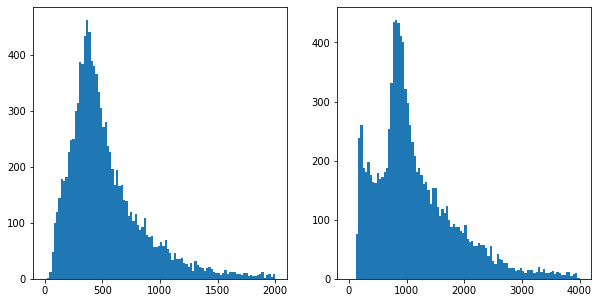

In [201]:
fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].hist(regions['surface_area'], bins=100, range=(0,2000))
ax[1].hist(regions['area'], bins=100, range=(0,4000))

In [46]:
np.min(regions['area'])

50

In [20]:
## Filter out regions with centroids at edges

# Find rows with centroids at edges
df_edge = regions[regions['centroid-0'] == 0].append(regions[regions['centroid-1'] == 0]).append(regions[regions['centroid-2'] == 0])

# Find centroids at edges
c0 = np.zeros(len(df_edge), dtype='int')
c1 = np.zeros(len(df_edge), dtype='int')
c2 = np.zeros(len(df_edge), dtype='int')
for i, row in enumerate(df_edge.index):
    c0[i] = df_edge['centroid-0'][row]
    c1[i] = df_edge['centroid-1'][row]
    c2[i] = df_edge['centroid-2'][row]

# Get label for centroids at edge
label_edge = np.zeros(len(c0), dtype='int')
for i in range(len(c0)):
    label_edge[i] = im[c0[i], c1[i], c2[i]]

# filter out segments
im_filt = np.copy(im)
for label in label_edge:
    im_filt = np.where(im_filt == label, 0, im_filt)

In [19]:
#im_PIL = Image.fromarray(im_lab[0,:,:])